<a href="https://colab.research.google.com/github/SandySingh72/DATA_Analytics/blob/main/TensorFlow_Modelling_with_HR_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
hr = pd.read_csv("HR_comma_sep.csv")
dum_hr = pd.get_dummies(hr)

In [3]:
train, test = train_test_split( dum_hr, test_size=0.3, random_state=25, stratify=dum_hr['left'] )
X_train = train.drop('left', axis=1)
y_train = train['left']
X_test = test.drop('left', axis=1)
y_test = test['left']


In [4]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10496, 20), (10496,), (4499, 20), (4499,))

In [6]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
13389,0.48,0.77,5,250,2,0,1,False,True,False,False,False,False,False,False,False,False,False,False,True
7957,0.90,0.62,5,225,2,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3220,0.48,0.94,3,162,3,1,0,False,False,False,False,False,False,False,True,False,False,False,False,True
14307,0.38,0.52,2,154,3,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
8691,0.85,0.99,5,176,4,0,0,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0.10,0.93,6,269,4,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False
6575,0.72,0.63,4,207,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
12608,0.37,0.47,2,138,3,1,0,False,False,True,False,False,False,False,False,False,False,False,False,True
1518,0.10,0.82,7,265,4,0,0,False,True,False,False,False,False,False,False,False,False,False,True,False


In [7]:
scaler = MinMaxScaler().set_output(transform='pandas')
X_trn_scl = scaler.fit_transform(X_train)
X_tst_scl = scaler.transform(X_test)

In [8]:
from re import X
X_trn_scl


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
13389,0.428571,0.640625,0.6,0.719626,0.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7957,0.890110,0.406250,0.6,0.602804,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3220,0.428571,0.906250,0.2,0.308411,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14307,0.318681,0.250000,0.0,0.271028,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8691,0.835165,0.984375,0.6,0.373832,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,0.010989,0.890625,0.8,0.808411,0.250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6575,0.692308,0.421875,0.4,0.518692,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12608,0.307692,0.171875,0.0,0.196262,0.125,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1518,0.010989,0.718750,1.0,0.789720,0.250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Model Definition**

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, kernel_initializer=tf.keras.initializers.LecunNormal(seed=25),
                          bias_initializer=tf.keras.initializers.Zeros(),
                          activation='sigmoid')
])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

None


# **Initial Weights**

In [10]:
model.get_weights()

[array([[-0.15041707],
        [-0.25105673],
        [-0.0166814 ],
        [ 0.0728163 ],
        [ 0.00852615],
        [-0.39407754],
        [-0.49116752],
        [-0.25664976],
        [-0.03926757],
        [ 0.21883382],
        [ 0.43239102],
        [-0.01564116],
        [ 0.33453202],
        [ 0.50644463],
        [-0.27460992],
        [-0.06551686],
        [-0.18730466],
        [ 0.09159895],
        [ 0.22104765],
        [-0.07176467]], dtype=float32),
 array([0.], dtype=float32)]

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy() ,metrics=['acc'])

In [12]:
history = model.fit( X_trn_scl, y_train, validation_data=(X_tst_scl, y_test), epochs=100)

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.7276 - loss: 0.5823 - val_acc: 0.7653 - val_loss: 0.5265
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.7632 - loss: 0.5207 - val_acc: 0.7617 - val_loss: 0.5105
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7635 - loss: 0.5032 - val_acc: 0.7615 - val_loss: 0.4981
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7559 - loss: 0.5005 - val_acc: 0.7611 - val_loss: 0.4877
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7586 - loss: 0.4851 - val_acc: 0.7615 - val_loss: 0.4791
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7620 - loss: 0.4747 - val_acc: 0.7624 - val_loss: 0.4719
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.7647 - loss: 0.4700 - val_acc: 0.7637 - val_loss: 0.4659
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7735 - loss: 0.4602 - val_acc: 0.7804 - val_loss: 0.4608
Epoch 9/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

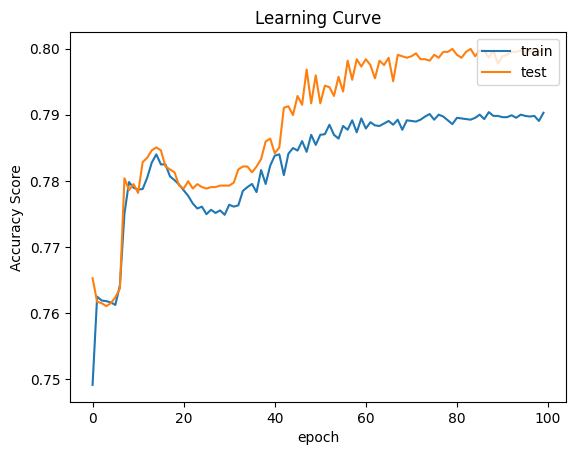

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Learning Curve')
plt.ylabel('Accuracy Score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

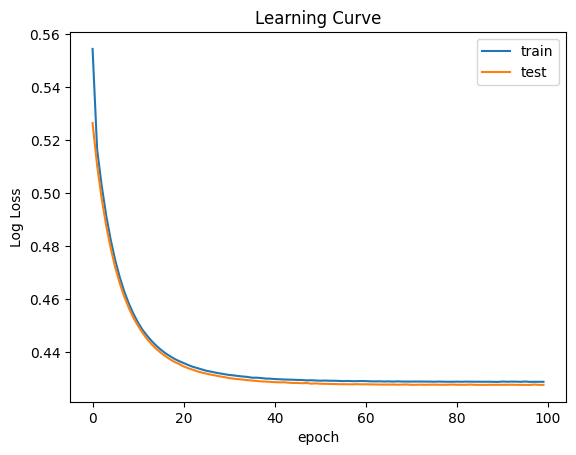

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Log Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [15]:
accuracy, logloss = model.evaluate(X_tst_scl, y_test)
print(f"Accuracy: {accuracy}")
print(f"Log Loss: {logloss}")

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7981 - loss: 0.4288
Accuracy: 0.427718847990036
Log Loss: 0.7999555468559265
